In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Pandas to read and operate the data;
#Seaborn to plot and explore the data;
#Sklearn to import ML models.

In [81]:
pd.set_option('display.max_column',500)

In [45]:
dir(sns)

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_orig_rc_params',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'external',
 'factorplot',
 'get_dataset_names',
 'heatmap',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load_dataset',
 'lvplot',
 'matrix',
 'miscplot',
 'mpl',
 'mpl_palette',
 'pairplot',
 'palettes',
 'palplot',
 'plotting_context',
 'poin

In [46]:
# 思路
# 因为没有离职时间变量， 所以此题仅仅把所有的特征做为输入， LR模型进行 0 or 1预测，得出结果

In [47]:
# 已知缺陷 
# 机器学习 没有考虑到的特征会使结果偏差很大

In [48]:
# 步骤
# 1. 加载数据
# 2. 选取全部column 作为特征还是部分?
#    i)   PCA 取主要特征
#    ii)  ？？？我也不知道
# 3. 数据

In [49]:
# 参考 https://www.kaggle.com/robert333/kerneld75011568e

In [50]:
# 标准机器学习步骤
# 1. 数据收集  -- done by Kaggle
# 2. 预处理    -- load
# 3. 模型选择   -- 通过分析 use LR， 也可以采用TPOT
# 4. 训练      -- 
# 5. 评估      --
# 6. 超参数    --
# 7. 预测      --

In [51]:
train_employee_data=pd.read_csv("./train.csv")
test_employee_data=pd.read_csv("./test.csv")

In [70]:
train_employee_data.shape

(1176, 36)

In [82]:
train_employee_data.head()

,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1374,58,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1,1938,4,Female,72,3,4,Manager,4,Married,17875,11761,4,Y,Yes,13,3,3,80,1,29,2,2,1,0,0,0
1,1092,45,No,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1,1546,4,Male,97,3,1,Research Scientist,4,Married,2132,4585,4,Y,No,20,4,4,80,1,8,3,3,5,4,0,3
2,768,40,No,Travel_Rarely,300,Sales,26,3,Marketing,1,1066,3,Male,74,3,2,Sales Executive,1,Married,8396,22217,1,Y,No,14,3,2,80,1,8,3,2,7,7,7,5
3,569,36,No,Non-Travel,1434,Sales,8,4,Life Sciences,1,789,1,Male,76,2,3,Sales Executive,1,Single,7587,14229,1,Y,No,15,3,2,80,0,10,1,3,10,7,0,9
4,911,25,Yes,Travel_Frequently,599,Sales,24,1,Life Sciences,1,1273,3,Male,73,1,1,Sales Representative,4,Single,1118,8040,1,Y,Yes,14,3,4,80,0,1,4,3,1,0,1,0


In [69]:
train_employee_data.groupby(train_employee_data['Age'].apply(lambda x: x//10))['Age'].agg(['count','max'])

,count,max
Age,,
1,14,19
2,250,29
3,499,39
4,284,49
5,125,59
6,4,60


In [73]:
499/1176

0.42431972789115646

In [52]:
train_employee_data.isnull().any() # 数据都okay

user_id                     False
Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYe

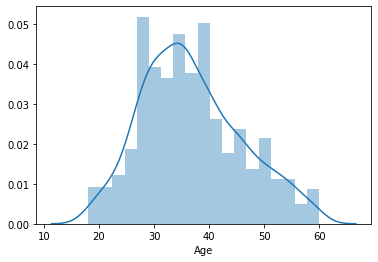

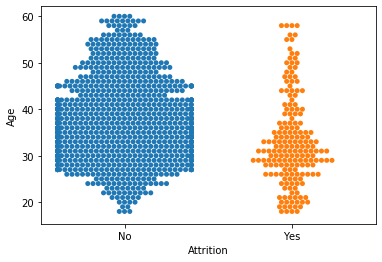

In [74]:
#the relationship between predictors and target;
### 中心极限定理: 只要重复次数足够多，那么这些值的平均值满足 高斯分布(正态分布)
sns.distplot(train_employee_data['Age'], kde=True);
plt.show();

sns.swarmplot(x=train_employee_data['Attrition'], y=train_employee_data['Age']);
plt.show();

#We find that those who decide to quit generally have younger age.



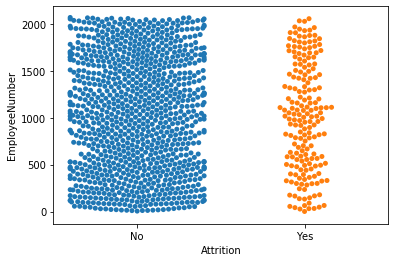

In [76]:
#the relationship between `EmployeeNumber` and `Attrition`.;
sns.swarmplot(x=train_employee_data['Attrition'], y=train_employee_data['EmployeeNumber']);

#As we could see here, EmployeeNumber performs no particular relationship with Attrition.


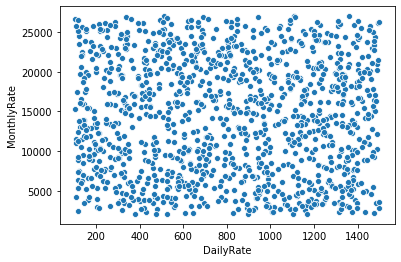

In [83]:
 #the confusing relationship among `DailyRate`, `MonthlyRate`, and `MonthlyIncome`
sns.scatterplot(x=train_employee_data['DailyRate'], y=train_employee_data['MonthlyRate']);
plt.show();

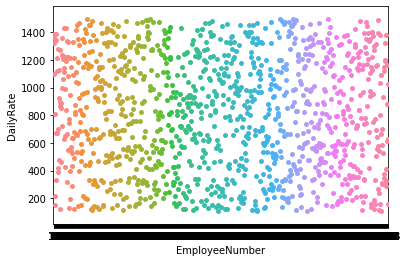

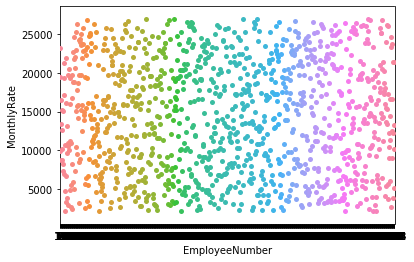

In [86]:
sns.swarmplot(x=train_employee_data['EmployeeNumber'], y=train_employee_data['DailyRate']);
plt.show();

sns.swarmplot(x=train_employee_data['EmployeeNumber'], y=train_employee_data['MonthlyRate']);
plt.show();